In [4]:
import pandas as pd
import numpy as np
import yfinance as yf

# Day 1 - Data Stats

## 1.1. Data import

In [5]:
# TSM (Tech), JPM (Finanse), XOM (Energia), EEM (Rynki Wschodzące), SPY (Benchmark)
tickers = ['TSM', 'AAPL', 'JPM', 'XOM', 'EEM', 'SPY', 'GLD', 'BND']

start_date = '2019-01-01'
end_date = '2024-01-01'

# yfinance pobiera wiele metryk naraz. Od razu izolujemy 'Adj Close' na końcu wywołania.
# Używanie Adjusted Close jest krytyczne w modelach portfelowych, bo uwzględnia dywidendy i splity akcji.
data = yf.download(tickers, start=start_date, end=end_date, auto_adjust=False)

[*********************100%***********************]  8 of 8 completed


In [6]:
data.head()

Price       Adj Close                                               \
Ticker           AAPL        BND        EEM         GLD        JPM   
Date                                                                 
2019-01-02  37.503723  64.516884  33.319092  121.330002  81.250191   
2019-01-03  33.768070  64.768906  32.714993  122.430000  80.095505   
2019-01-04  35.209606  64.573776  33.770046  121.440002  83.048264   
2019-01-07  35.131248  64.476234  33.846611  121.860001  83.106010   
2019-01-08  35.800961  64.394928  33.974251  121.529999  82.949265   

Price                                             Close             ...  \
Ticker             SPY        TSM        XOM       AAPL        BND  ...   
Date                                                                ...   
2019-01-02  224.995270  31.237246  50.001854  39.480000  79.370003  ...   
2019-01-03  219.626297  29.389694  49.234127  35.547501  79.680000  ...   
2019-01-04  226.982834  29.911469  51.049381  37.064999  79.440002  ...   
2019-01-07  228.772583  30.133848  51.314842  36.982498  79.320000  ...   
2019-01-08  230.921890  29.885801  51.687946  37.687500  79.220001  ...   

Price            Open                Volume                                \
Ticker            TSM        XOM       AAPL      BND        EEM       GLD   
Date                                                                        
2019-01-02  36.200001  67.349998  148158800  4142500   57198800  12776200   
2019-01-03  35.340000  70.000000  365248800  4908400   62767600  15440800   
2019-01-04  34.459999  69.639999  234428400  4583600  103055100  13334000   
2019-01-07  35.009998  71.250000  219111200  4121700   76597000   7473600   
2019-01-08  35.110001  72.540001  164101200  1745400   70518200   7643100   

Price                                                
Ticker           JPM        SPY       TSM       XOM  
Date                                                 
2019-01-02  15670900  126925200   5273100  16727200  
2019-01-03  16286400  144140700  15998000  13866100  
2019-01-04  16935200  142628800  14178200  16043600  
2019-01-07  15430700  103139100   6850800  10844200  
2019-01-08  13578800  102512600  11462600  11439000  

[5 rows x 48 columns]

In [7]:
data = data['Adj Close']

In [8]:
data.shape

(1258, 8)

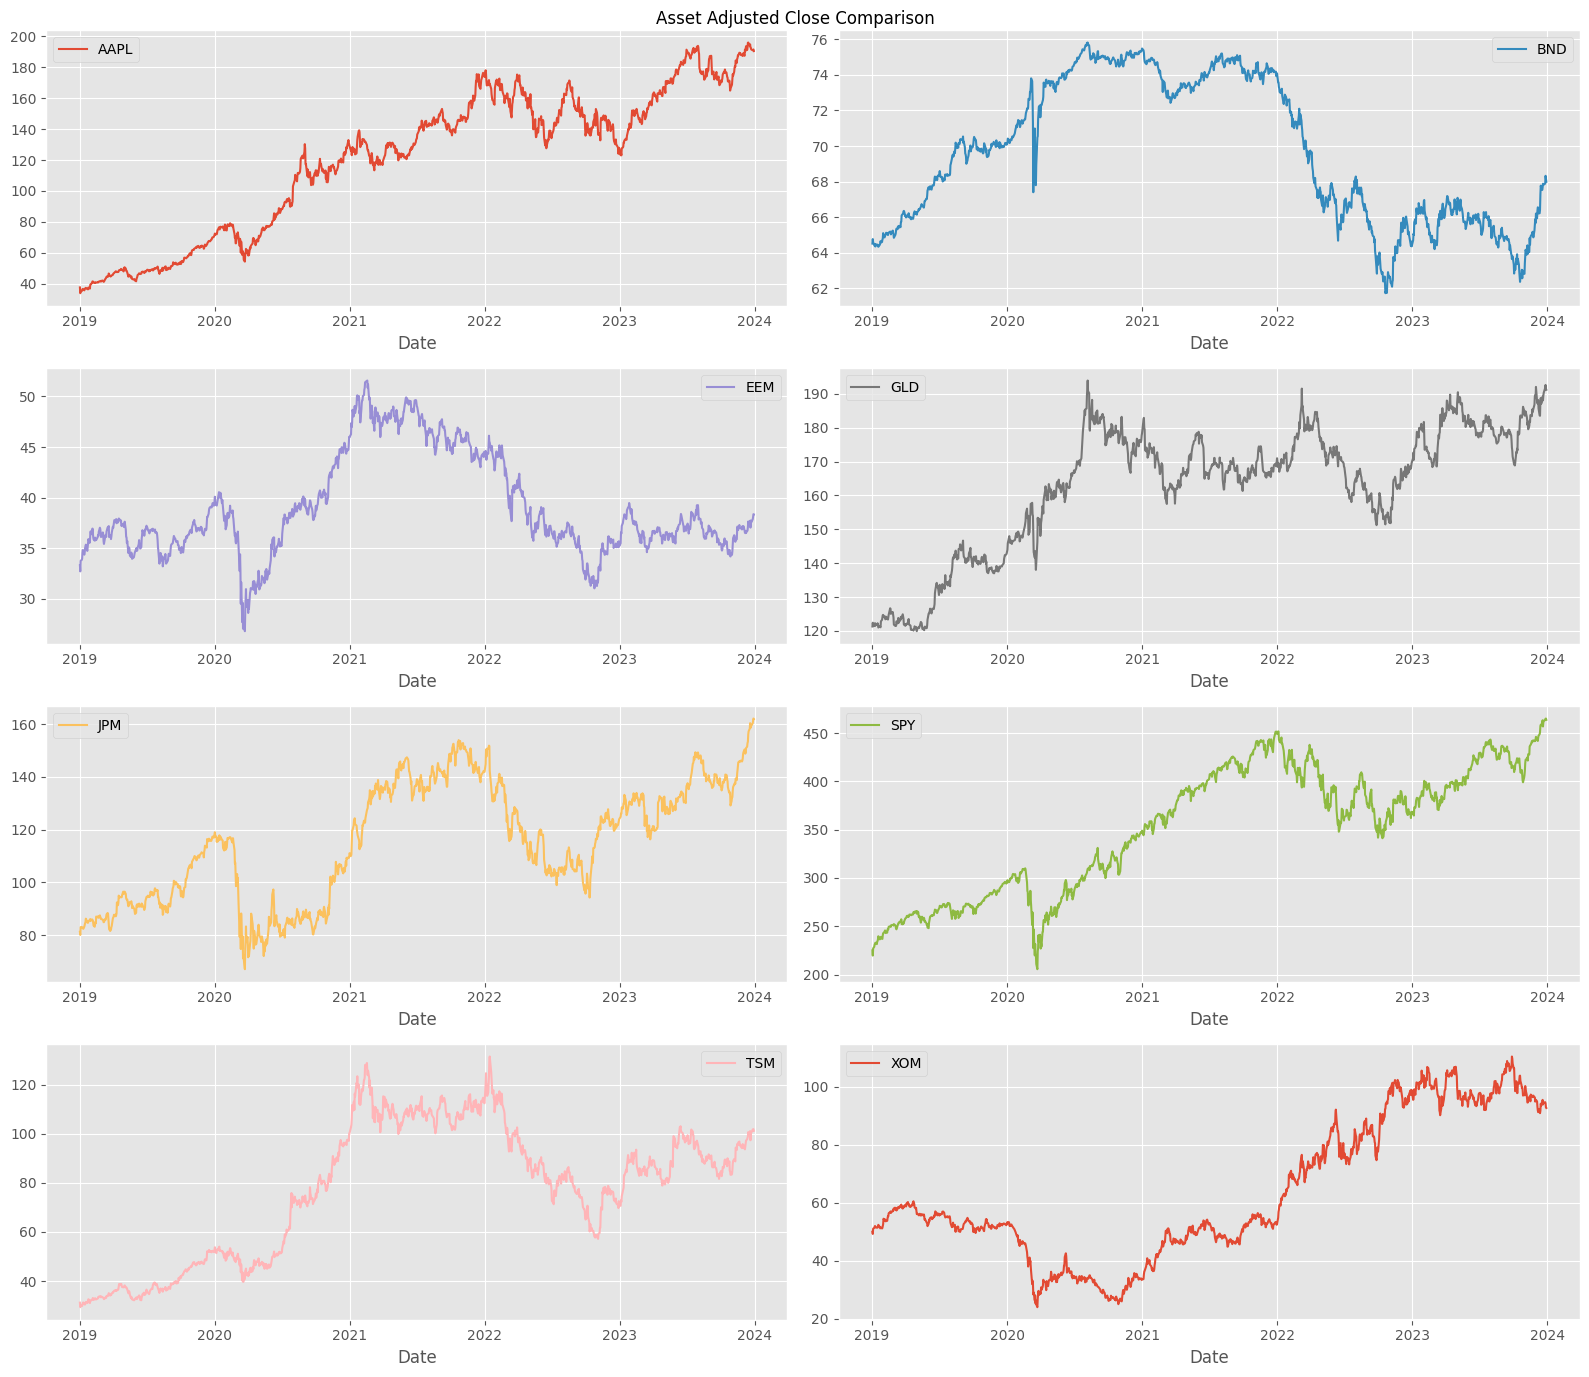

In [9]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

axes = data.plot(
    subplots=True, 
    layout=(4, 2),       
    figsize=(16, 14),  
    sharex=False,    
    grid=True,             
    linewidth=1.5,
    title="Asset Adjusted Close Comparison",
)
plt.tight_layout()      


## 1.2. Data Cleaning

In [10]:
print("Missing Data:", data.isnull().sum().sum())

Missing Data: 0


In [11]:
data.dropna()

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-02,37.503723,64.516884,33.319092,121.330002,81.250191,224.995270,31.237246,50.001854
2019-01-03,33.768070,64.768906,32.714993,122.430000,80.095505,219.626297,29.389694,49.234127
2019-01-04,35.209606,64.573776,33.770046,121.440002,83.048264,226.982834,29.911469,51.049381
2019-01-07,35.131248,64.476234,33.846611,121.860001,83.106010,228.772583,30.133848,51.314842
2019-01-08,35.800961,64.394928,33.974251,121.529999,82.949265,230.921890,29.885801,51.687946
...,...,...,...,...,...,...,...,...
2023-12-22,191.609482,67.826843,37.554214,190.270004,159.387558,462.223328,100.357903,94.430153
2023-12-26,191.065125,67.891563,37.849838,191.720001,160.330215,464.175079,101.622711,94.643265
2023-12-27,191.164093,68.326103,38.069180,192.589996,161.291824,465.014313,101.817307,94.198509


## 1.3. Calculating Daily Log Returns

In [12]:
data.head()

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-02,37.503723,64.516884,33.319092,121.330002,81.250191,224.995270,31.237246,50.001854
2019-01-03,33.768070,64.768906,32.714993,122.430000,80.095505,219.626297,29.389694,49.234127
2019-01-04,35.209606,64.573776,33.770046,121.440002,83.048264,226.982834,29.911469,51.049381
2019-01-07,35.131248,64.476234,33.846611,121.860001,83.106010,228.772583,30.133848,51.314842
2019-01-08,35.800961,64.394928,33.974251,121.529999,82.949265,230.921890,29.885801,51.687946


In [13]:
previous_prices = data.shift(1)
previous_prices


Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-03,37.503723,64.516884,33.319092,121.330002,81.250191,224.995270,31.237246,50.001854
2019-01-04,33.768070,64.768906,32.714993,122.430000,80.095505,219.626297,29.389694,49.234127
2019-01-07,35.209606,64.573776,33.770046,121.440002,83.048264,226.982834,29.911469,51.049381
2019-01-08,35.131248,64.476234,33.846611,121.860001,83.106010,228.772583,30.133848,51.314842
...,...,...,...,...,...,...,...,...
2023-12-22,192.678345,67.872147,37.735405,189.429993,159.482788,461.296295,99.774162,94.263367
2023-12-26,191.609482,67.826843,37.554214,190.270004,159.387558,462.223328,100.357903,94.430153
2023-12-27,191.065125,67.891563,37.849838,191.720001,160.330215,464.175079,101.622711,94.643265


In [14]:
log_returns = np.log(data/previous_prices)
log_returns = log_returns.dropna()  #drops first row
print(log_returns.shape)
log_returns.head()

(1257, 8)


Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-03,-0.104925,0.003899,-0.018297,0.009025,-0.014313,-0.024152,-0.060967,-0.015473
2019-01-04,0.041803,-0.003017,0.031741,-0.008119,0.036202,0.032947,0.017598,0.036206
2019-01-07,-0.002228,-0.001512,0.002265,0.003453,0.000695,0.007854,0.007407,0.005187
2019-01-08,0.018884,-0.001262,0.003764,-0.002712,-0.001888,0.009351,-0.008266,0.007245
2019-01-09,0.016839,0.001388,0.017625,0.006398,-0.001692,0.004663,0.018994,0.005261


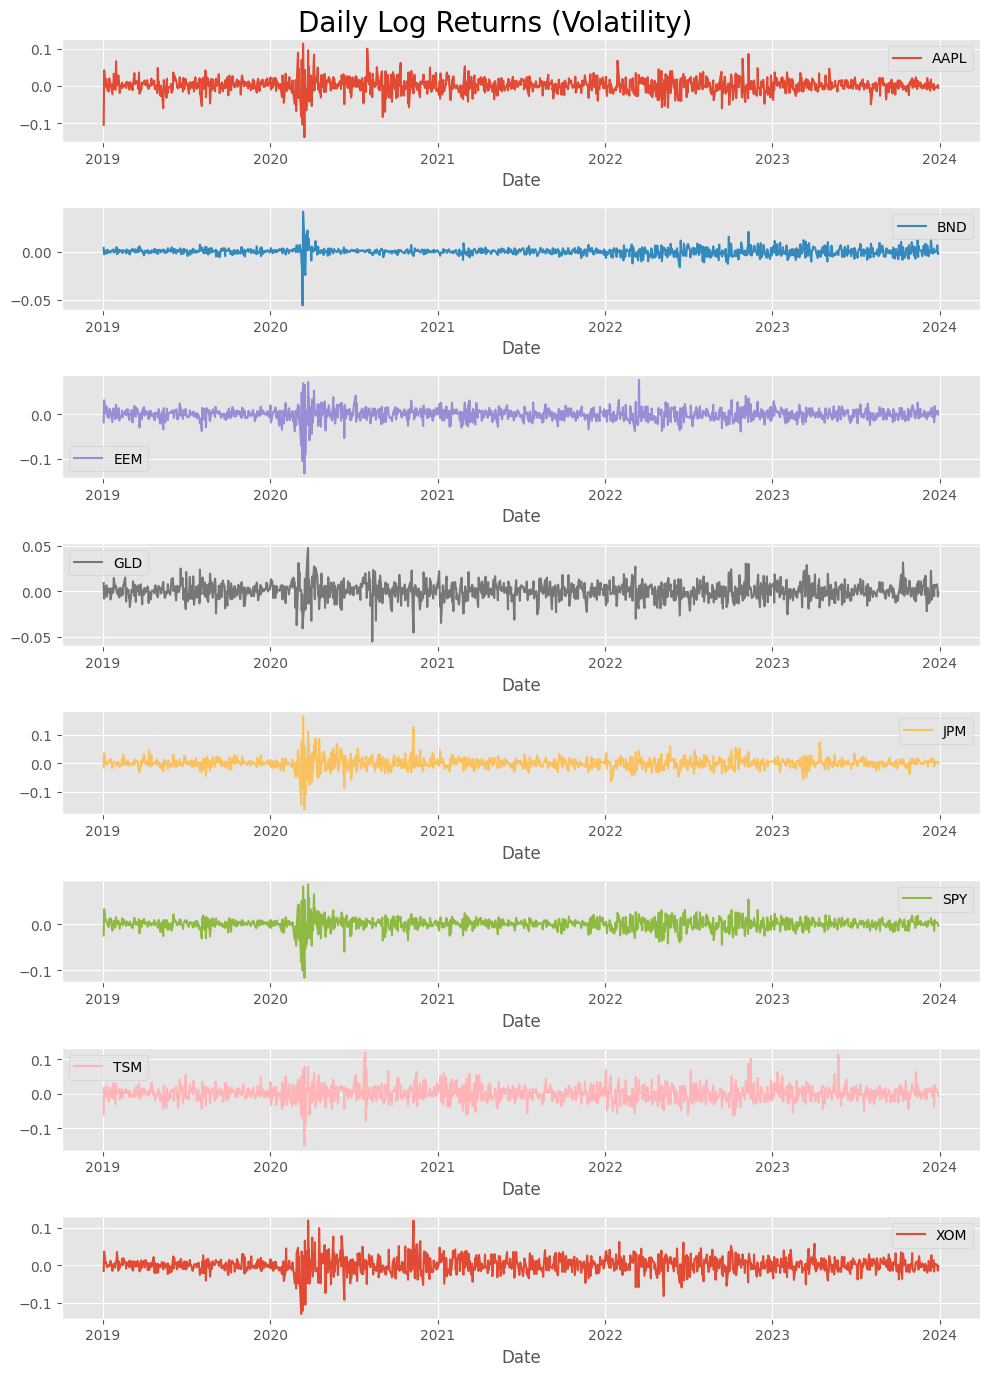

In [15]:
log_returns.plot(figsize=(10,14), subplots=True, sharex=False)
plt.suptitle('Daily Log Returns (Volatility)', fontsize=20)

plt.tight_layout()


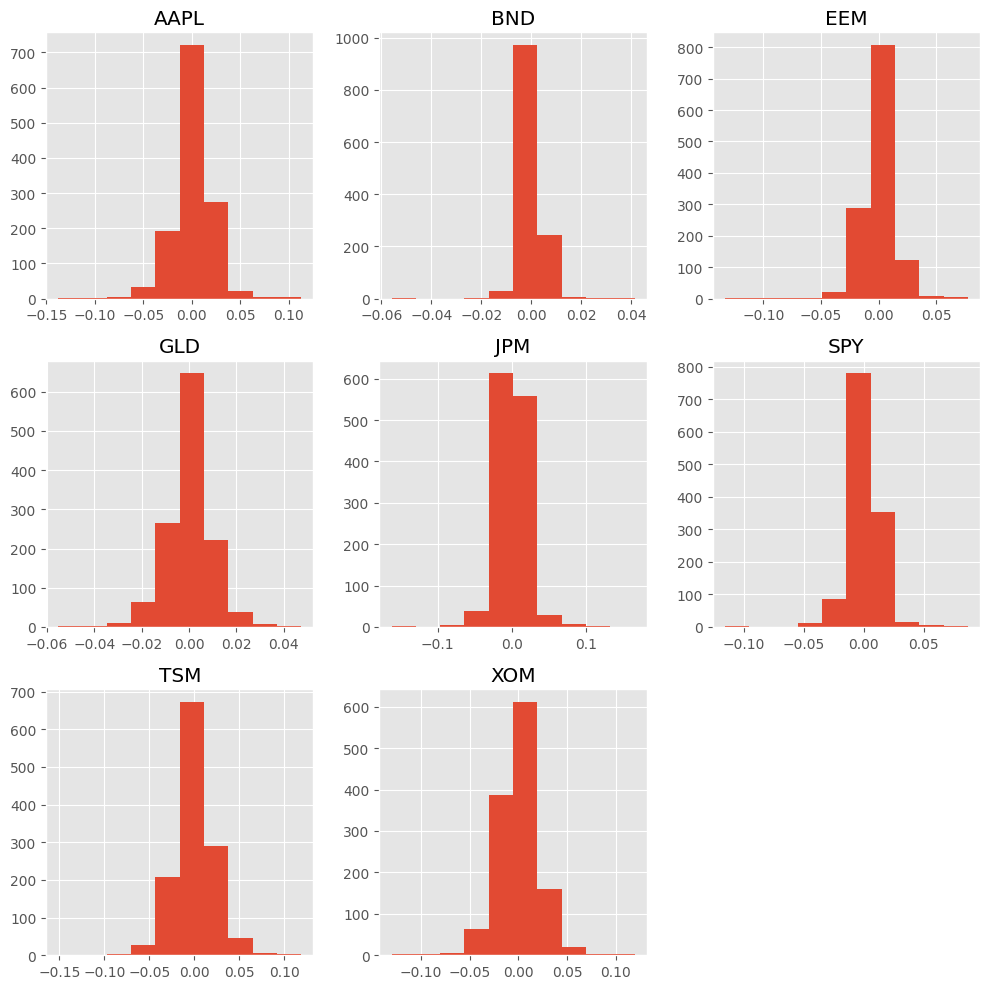

In [16]:
#returns histogram
log_returns.hist(figsize=(10,10))
plt.tight_layout()

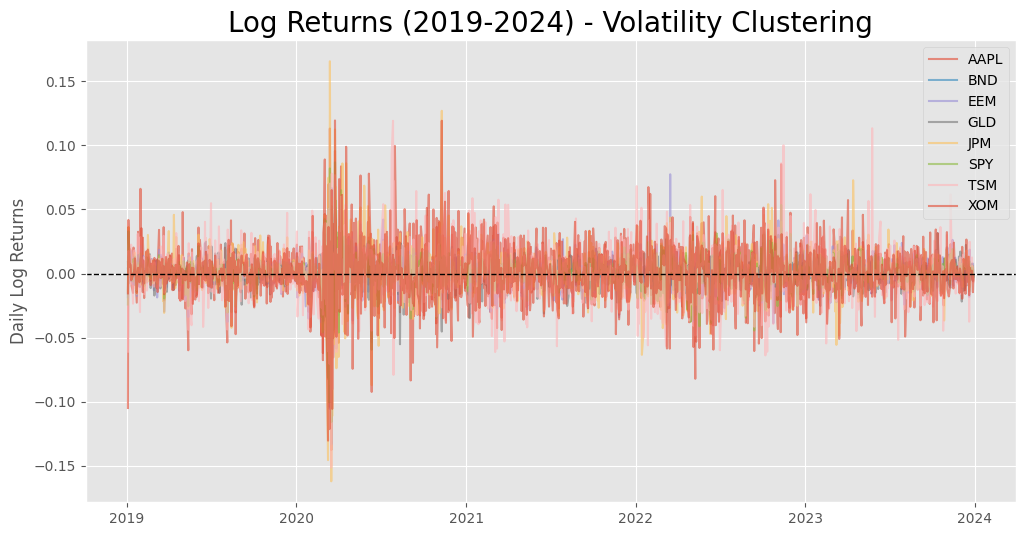

In [17]:
import matplotlib.pyplot as plt

# --- 1. Szereg czasowy (Wizualizacja Volatility Clustering) ---
# Powinieneś zauważyć, że w okresach kryzysów (np. marzec 2020) 
# wykres "szaleje" (duże odchylenia od zera) dla wszystkich aktywów naraz.
plt.figure(figsize=(12, 6))
plt.plot(log_returns, alpha=0.6)
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Log Returns (2019-2024) - Volatility Clustering', fontsize=20)
plt.ylabel('Daily Log Returns')
plt.legend(log_returns.columns)
plt.show()


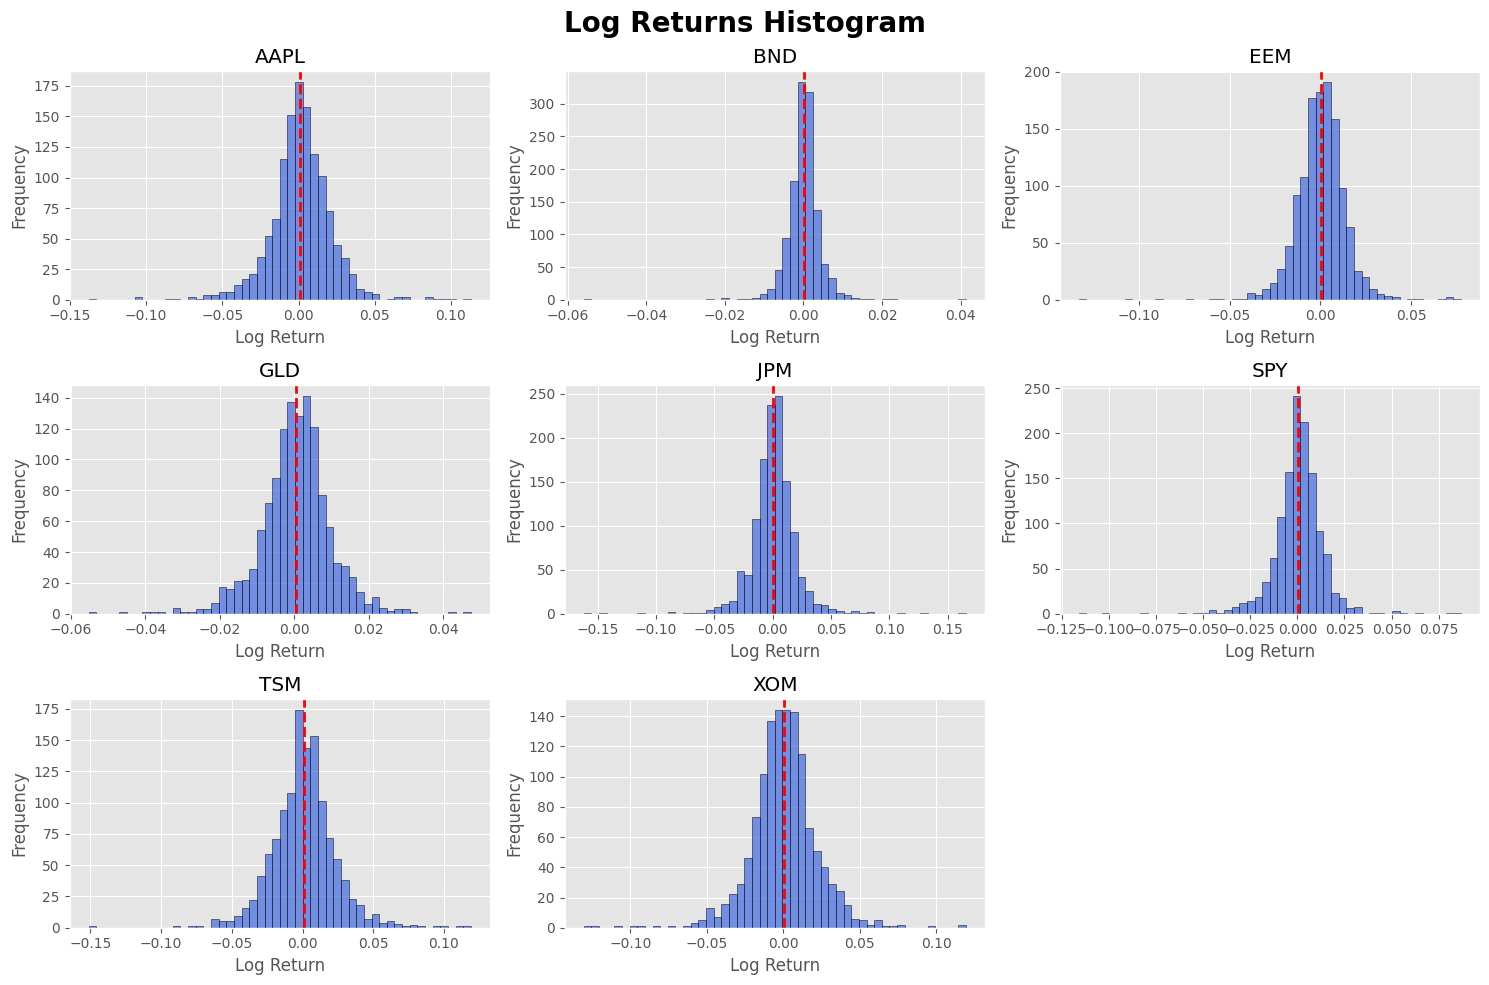

In [18]:
import matplotlib.pyplot as plt

# 1. Generate plots
axes = log_returns.hist(bins=50, figsize=(15, 10), color='royalblue', edgecolor='black', alpha=0.7)

# 2. Iterate through axes
for ax in axes.flatten():
    ticker = ax.get_title()
    
    # Check if the title corresponds to a valid column
    if ticker in log_returns.columns:
        mean_val = log_returns[ticker].mean()
        ax.axvline(mean_val, color='red', linestyle='dashed', linewidth=2)
        # Optional: Add a label for clarity
        ax.set_xlabel('Log Return')
        ax.set_ylabel('Frequency')
    else:
        # Hide empty subplots for a cleaner look
        ax.set_axis_off()

plt.suptitle('Log Returns Histogram', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

## 1.4. Covariance and the Covariance Martix

### Intuition - in normal covariance we are measuring deviations from a population average. in the financial context, we need to measure deviations from an average daily return (hence why we use the log returns dataframe as our data for the function)

In [19]:
daily_covar_martix = log_returns.cov()
daily_covar_martix

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Ticker,,,,,,,,
AAPL,0.000413,0.000012,0.000178,0.000016,0.000187,0.000217,0.000260,0.000142
BND,0.000012,0.000018,0.000010,0.000015,0.000003,0.000011,0.000010,-0.000003
EEM,0.000178,0.000010,0.000201,0.000025,0.000174,0.000147,0.000219,0.000150
GLD,0.000016,0.000015,0.000025,0.000089,-0.000010,0.000013,0.000025,0.000012
JPM,0.000187,0.000003,0.000174,-0.000010,0.000402,0.000196,0.000192,0.000257
SPY,0.000217,0.000011,0.000147,0.000013,0.000196,0.000176,0.000189,0.000160
TSM,0.000260,0.000010,0.000219,0.000025,0.000192,0.000189,0.000501,0.000152
XOM,0.000142,-0.000003,0.000150,0.000012,0.000257,0.000160,0.000152,0.000466


In [20]:
trading_days = 252

In [21]:
#the main diagonal of this is the annualized VARIANCE (covariance with itself)
annualized_covar_matrix = daily_covar_martix * 252
annualized_covar_matrix

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Ticker,,,,,,,,
AAPL,0.104004,0.003023,0.044897,0.004116,0.047067,0.054788,0.065439,0.035702
BND,0.003023,0.004583,0.002593,0.003841,0.000653,0.002653,0.002432,-0.000732
EEM,0.044897,0.002593,0.050666,0.006315,0.043811,0.036959,0.055229,0.037788
GLD,0.004116,0.003841,0.006315,0.022351,-0.002446,0.003392,0.006189,0.003077
JPM,0.047067,0.000653,0.043811,-0.002446,0.101372,0.049386,0.048265,0.064863
SPY,0.054788,0.002653,0.036959,0.003392,0.049386,0.044448,0.047560,0.040245
TSM,0.065439,0.002432,0.055229,0.006189,0.048265,0.047560,0.126200,0.038406
XOM,0.035702,-0.000732,0.037788,0.003077,0.064863,0.040245,0.038406,0.117536


In [22]:
# log annualized returns (average) 
log_annualized_returns_average_asset = log_returns.mean() * trading_days
log_annualized_returns_average_asset

Ticker
AAPL    0.325871
BND     0.010549
EEM     0.028170
GLD     0.091147
JPM     0.138290
SPY     0.145039
TSM     0.235629
XOM     0.123630
dtype: float64

In [23]:
#converted to actual annual returns (discrete)
# This creates a new Series of formatted strings
annualized_returns_average_asset = ((np.exp(log_annualized_returns_average_asset) - 1) * 100).map("{:.2f}%".format)
annualized_returns_average_asset


Ticker
AAPL    38.52%
BND      1.06%
EEM      2.86%
GLD      9.54%
JPM     14.83%
SPY     15.61%
TSM     26.57%
XOM     13.16%
dtype: str

In [24]:
#variances and volatilities
annual_variances = np.diag(annualized_covar_matrix)
print(annual_variances)

annual_volatilities = np.sqrt(annual_variances)
print(annual_volatilities)

volatility_series = pd.Series(annual_volatilities, index=annualized_covar_matrix.columns)

print()
print("--- ANNUALIZED VOLATILITY ---")
print(volatility_series)

[0.10400369 0.0045833  0.05066615 0.02235115 0.10137248 0.04444847
 0.12619991 0.11753568]
[0.32249603 0.06770008 0.22509142 0.14950301 0.31839046 0.21082806
 0.35524626 0.34283477]

--- ANNUALIZED VOLATILITY ---
Ticker
AAPL    0.322496
BND     0.067700
EEM     0.225091
GLD     0.149503
JPM     0.318390
SPY     0.210828
TSM     0.355246
XOM     0.342835
dtype: float64


## 1.5. Correlation (curiosity)

Text(0.5, 1.0, 'Correlation Matrix')

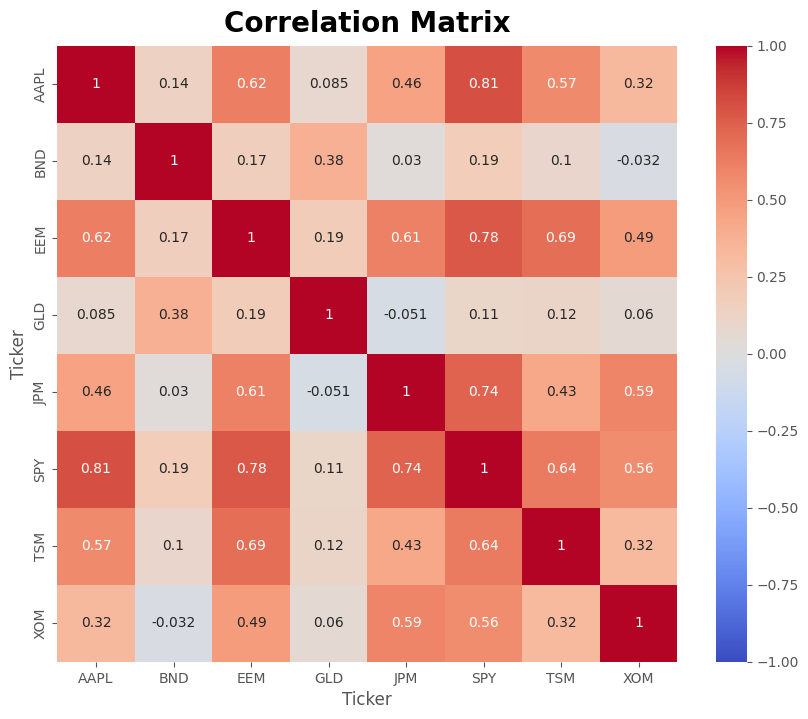

In [25]:
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(log_returns.corr(), annot=True, cmap='coolwarm',vmin=-1)
plt.title('Correlation Matrix', fontsize=20, pad=10, fontweight='demibold')

<Axes: xlabel='BND', ylabel='SPY'>

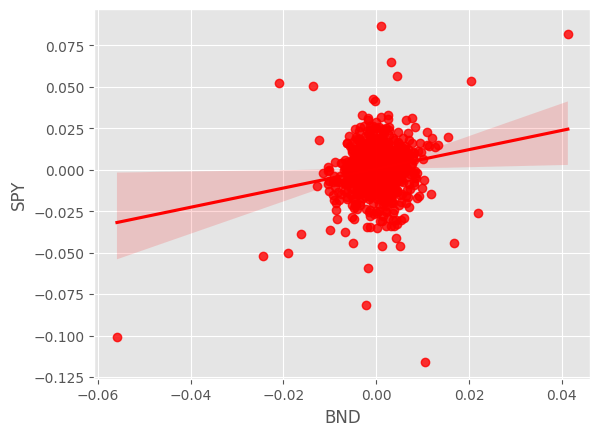

In [26]:
sns.regplot(x=log_returns['BND'], y=log_returns['SPY'], scatter=True, color='red')

# Day 2 - Equal-Weight Portfolio

## 2.1.1 Calculating Returns in 2 ways

In [27]:
#LOG VS SIMPLE TEST
initial_capital = 10000
equal_weights = np.array([1/data.columns.size] * data.columns.size)

### 2.1.1 SIMPLE:

In [28]:
simple_returns = data.pct_change().dropna()
simple_returns

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-03,-0.099608,0.003906,-0.018131,0.009066,-0.014211,-0.023863,-0.059146,-0.015354
2019-01-04,0.042689,-0.003013,0.032250,-0.008086,0.036865,0.033496,0.017754,0.036870
2019-01-07,-0.002225,-0.001511,0.002267,0.003458,0.000695,0.007885,0.007435,0.005200
2019-01-08,0.019063,-0.001261,0.003771,-0.002708,-0.001886,0.009395,-0.008232,0.007271
2019-01-09,0.016981,0.001389,0.017781,0.006418,-0.001690,0.004674,0.019176,0.005275
...,...,...,...,...,...,...,...,...
2023-12-22,-0.005547,-0.000667,-0.004802,0.004434,-0.000597,0.002010,0.005851,0.001769
2023-12-26,-0.002841,0.000954,0.007872,0.007621,0.005914,0.004223,0.012603,0.002257
2023-12-27,0.000518,0.006400,0.005795,0.004538,0.005998,0.001808,0.001915,-0.004699


In [29]:
#mu (average) simple - looks useless, but probably used in Markotitz (the over average simple returns are different...) - CHECK THIS!
#
mu_simple = simple_returns.mean() * 252
print(mu_simple)
print()
print(annualized_returns_average_asset)

Ticker
AAPL    0.378031
BND     0.012835
EEM     0.053375
GLD     0.102324
JPM     0.189012
SPY     0.167224
TSM     0.298916
XOM     0.182362
dtype: float64

Ticker
AAPL    38.52%
BND      1.06%
EEM      2.86%
GLD      9.54%
JPM     14.83%
SPY     15.61%
TSM     26.57%
XOM     13.16%
dtype: str


In [30]:
#actual returns (simple)
portfolio_simple = np.dot(simple_returns, equal_weights)
print(portfolio_simple.shape)
print()
print(portfolio_simple)

(1257,)

[-0.02716745  0.02360311  0.00290059 ...  0.00278408 -0.00081882
 -0.00283066]


In [31]:
#final wealth simple:
wealth_simple = initial_capital * (1 + portfolio_simple).cumprod()
wealth_simple

array([ 9728.32546907,  9957.94422481,  9986.82809305, ...,
       21953.9594744 , 21935.98308736, 21873.88988023], shape=(1257,))

### 2.1.2. LOG METHOD

In [32]:
simple_returns

Ticker,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM
Date,,,,,,,,
2019-01-03,-0.099608,0.003906,-0.018131,0.009066,-0.014211,-0.023863,-0.059146,-0.015354
2019-01-04,0.042689,-0.003013,0.032250,-0.008086,0.036865,0.033496,0.017754,0.036870
2019-01-07,-0.002225,-0.001511,0.002267,0.003458,0.000695,0.007885,0.007435,0.005200
2019-01-08,0.019063,-0.001261,0.003771,-0.002708,-0.001886,0.009395,-0.008232,0.007271
2019-01-09,0.016981,0.001389,0.017781,0.006418,-0.001690,0.004674,0.019176,0.005275
...,...,...,...,...,...,...,...,...
2023-12-22,-0.005547,-0.000667,-0.004802,0.004434,-0.000597,0.002010,0.005851,0.001769
2023-12-26,-0.002841,0.000954,0.007872,0.007621,0.005914,0.004223,0.012603,0.002257
2023-12-27,0.000518,0.006400,0.005795,0.004538,0.005998,0.001808,0.001915,-0.004699


In [33]:
daily_simple_returns = np.dot(simple_returns, equal_weights)
print(daily_simple_returns)
print()
print(daily_simple_returns.shape)

[-0.02716745  0.02360311  0.00290059 ...  0.00278408 -0.00081882
 -0.00283066]

(1257,)


In [34]:
#daily log return
daily_log_returns = np.log(1 + daily_simple_returns)
daily_log_returns


array([-0.02754331,  0.02332887,  0.00289639, ...,  0.00278021,
       -0.00081916, -0.00283467], shape=(1257,))

In [35]:
#total log return
total_log_return = daily_log_returns.sum()
total_log_return

np.float64(0.7827085896296426)

In [36]:
#total wealth
wealth_log = initial_capital * np.exp(total_log_return)
wealth_log

np.float64(21873.88988023204)

In [37]:
#for the wealth PATH use cumsum
wealth_log_path = initial_capital * np.exp(daily_log_returns.cumsum())
wealth_log_path

array([ 9728.32546907,  9957.94422481,  9986.82809305, ...,
       21953.9594744 , 21935.98308736, 21873.88988023], shape=(1257,))

In [38]:
#the wealth paths are mathematically identical, so this methodology works, but the log path is more elegant and numerically stable in practice.
print(wealth_simple)
print(wealth_log_path)

[ 9728.32546907  9957.94422481  9986.82809305 ... 21953.9594744
 21935.98308736 21873.88988023]
[ 9728.32546907  9957.94422481  9986.82809305 ... 21953.9594744
 21935.98308736 21873.88988023]


In [39]:
# czyli jak mam log returns to sposob przejscia w faktyczny return jest troche inny - bo mam zagwarantwana addytywnosc w czasie,
# ale nie mam zagwarantowanej addytywnosci miedzy poszczegolnymi aktywami,
# wiec zeby to obejsc biore returns miedzy aktywami z simple, i potem zmieniam recznie na log. inaczej nie przeskocze chyba.
# wiec simple returns lepiej tutaj chyba wykorzystac. nie zyskuje nic z logow.
# robienie log_returns = np.log(data/data.shift(1)) mija sie z celem bo calego portfela tutaj nie zlicze.

In [40]:
df = pd.Series(wealth_simple, index=(data.index[1:]))
print(df)
print()

Date
2019-01-03     9728.325469
2019-01-04     9957.944225
2019-01-07     9986.828093
2019-01-08    10018.553038
2019-01-09    10106.220140
                  ...     
2023-12-22    21787.874393
2023-12-26    21893.007573
2023-12-27    21953.959474
2023-12-28    21935.983087
2023-12-29    21873.889880
Length: 1257, dtype: float64



In [41]:
df.name = "Wealth"

# Join it to the DataFrame
data_combined = data.join(df)
data_combined

,AAPL,BND,EEM,GLD,JPM,SPY,TSM,XOM,Wealth
Date,,,,,,,,,
2019-01-02,37.503723,64.516884,33.319092,121.330002,81.250191,224.995270,31.237246,50.001854,NaN
2019-01-03,33.768070,64.768906,32.714993,122.430000,80.095505,219.626297,29.389694,49.234127,9728.325469
2019-01-04,35.209606,64.573776,33.770046,121.440002,83.048264,226.982834,29.911469,51.049381,9957.944225
2019-01-07,35.131248,64.476234,33.846611,121.860001,83.106010,228.772583,30.133848,51.314842,9986.828093
2019-01-08,35.800961,64.394928,33.974251,121.529999,82.949265,230.921890,29.885801,51.687946,10018.553038
...,...,...,...,...,...,...,...,...,...
2023-12-22,191.609482,67.826843,37.554214,190.270004,159.387558,462.223328,100.357903,94.430153,21787.874393
2023-12-26,191.065125,67.891563,37.849838,191.720001,160.330215,464.175079,101.622711,94.643265,21893.007573
2023-12-27,191.164093,68.326103,38.069180,192.589996,161.291824,465.014313,101.817307,94.198509,21953.959474


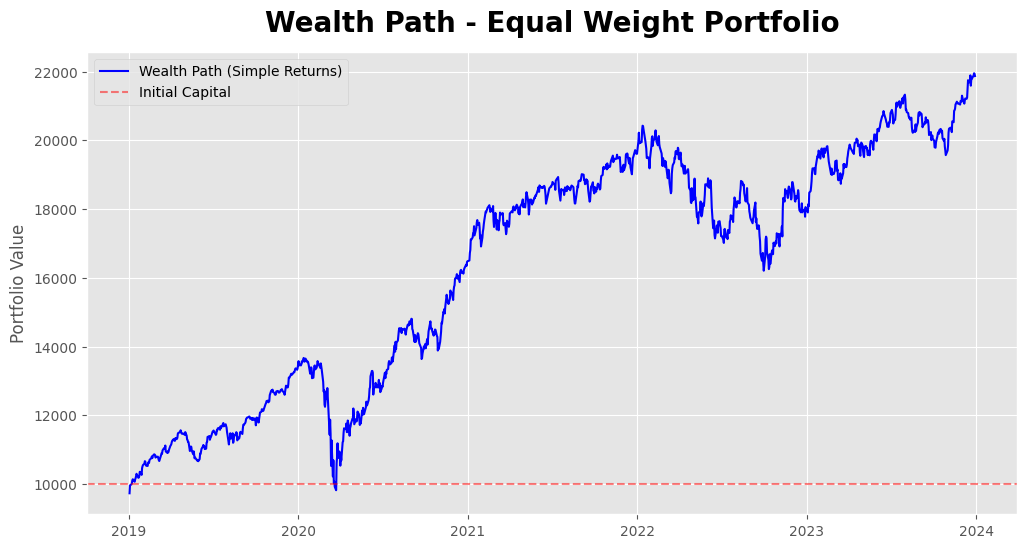

In [42]:
#vizing the wealth path.
plt.figure(figsize=(12, 6))
plt.plot(data_combined['Wealth'], label='Wealth Path (Simple Returns)', color='blue')
plt.axhline(y=initial_capital, color='red', linestyle='--', alpha=0.5, label='Initial Capital')
plt.title('Wealth Path - Equal Weight Portfolio', fontsize=20, pad=15, fontweight='bold')
plt.ylabel('Portfolio Value')
plt.legend()

In [43]:
#zle rozwiazanie
portfolio_log_wrong = np.dot(log_returns, equal_weights) # can't average logs across assets
portfolio_log_wrong


array([-0.02815039,  0.02317013,  0.00289005, ...,  0.00277408,
       -0.00084035, -0.0028367 ], shape=(1257,))

In [44]:
wealth_wrong = initial_capital * np.exp(portfolio_log_wrong.cumsum())
wealth_wrong

array([ 9722.42140075,  9950.32125523,  9979.11976194, ...,
       19907.1847834 , 19890.46278245, 19834.11955814], shape=(1257,))

## 2.2. Equal-weight Portfolio Stats/Analysis - Reusable Function

In [45]:
# return rate: let's use the compound annual growth rate (CAGR) - it accounts for compounding (unlike annualized average simple return)
# It's a transformed yearly compounding formula.

### WRITING IT AGAIN TO THROW INTO A FUNCTION

In [46]:
equal_weights = np.ones(data.columns.size) / data.columns.size

In [47]:
eq_portfolio_returns = simple_returns @ equal_weights # equivalent to np.dot(simple_returns, equal_weights)
eq_portfolio_returns

Date
2019-01-03   -0.027167
2019-01-04    0.023603
2019-01-07    0.002901
2019-01-08    0.003177
2019-01-09    0.008750
                ...   
2023-12-22    0.000306
2023-12-26    0.004825
2023-12-27    0.002784
2023-12-28   -0.000819
2023-12-29   -0.002831
Length: 1257, dtype: float64

In [48]:
total_return_rate = (1 + eq_portfolio_returns).cumprod() - 1
total_return_rate

Date
2019-01-03   -0.027167
2019-01-04   -0.004206
2019-01-07   -0.001317
2019-01-08    0.001855
2019-01-09    0.010622
                ...   
2023-12-22    1.178787
2023-12-26    1.189301
2023-12-27    1.195396
2023-12-28    1.193598
2023-12-29    1.187389
Length: 1257, dtype: float64

In [49]:
# annualized average return rate - looks useless
annualized_average_return_rate = eq_portfolio_returns.mean() * trading_days
annualized_average_return_rate


np.float64(0.17300983145562474)

In [50]:
eq_portfolio_returns.mean()

np.float64(0.000686546950220733)

In [51]:
eq_portfolio_returns

Date
2019-01-03   -0.027167
2019-01-04    0.023603
2019-01-07    0.002901
2019-01-08    0.003177
2019-01-09    0.008750
                ...   
2023-12-22    0.000306
2023-12-26    0.004825
2023-12-27    0.002784
2023-12-28   -0.000819
2023-12-29   -0.002831
Length: 1257, dtype: float64

In [52]:
# volatility

# daily variance
print("daily variance:",eq_portfolio_returns.var())

# annualized variance
print("annalized variance", eq_portfolio_returns.var() * trading_days)

# annualized volatility
annualized_volatility = np.sqrt(eq_portfolio_returns.var() * trading_days)
print("annualized volatility", annualized_volatility)

daily variance: 0.0001268736144620527
annalized variance 0.03197215084443728
annualized volatility 0.1788075805004846


In [90]:
# calc volatility/std function
def calculate_volatility (weights, data):
    portfolio_returns = data.pct_change() @ weights
    annualized_variance = portfolio_returns.var() * trading_days
    annualized_volatility = np.sqrt(annualized_variance)
    return annualized_volatility

In [54]:
equal_weights = np.ones(len(tickers)) * (1 / len(tickers))

calculate_volatility(data, equal_weights)

np.float64(0.1788075805004846)

In [91]:
# calc average return for sharpe
def calculate_mean_portfolio_returns (weights, data):
    portfolio_returns = data.pct_change() @ weights
    annualized_return = portfolio_returns.mean() * 252
    return annualized_return

In [56]:
data.pct_change() @ equal_weights

Date
2019-01-02         NaN
2019-01-03   -0.027167
2019-01-04    0.023603
2019-01-07    0.002901
2019-01-08    0.003177
                ...   
2023-12-22    0.000306
2023-12-26    0.004825
2023-12-27    0.002784
2023-12-28   -0.000819
2023-12-29   -0.002831
Length: 1258, dtype: float64

In [92]:
calculate_mean_portfolio_returns(equal_weights, data)

np.float64(0.17300983145562476)

In [58]:
#looks like for the function to compare portfolio's all i'd need is one that takes in weights and the price data, and the rest i can calculate based on that
# i should have a few functions. one for returns CAGR? one for wealth path? for plotting? and then the whole statistics thing like volatility and sharpe ratios...

In [59]:
trading_days

252

In [60]:
# i have the volatility. for sharpe ratio, i need the risk free rate and portfolio returns. 
# should i use cagr? no, arithmetic average is what is typically use in Sharpe, and is an input into Markowitza and CAPM (despite it not reporting true return due to drag)
eq_portfolio_returns.mean() * trading_days

np.float64(0.17300983145562474)

In [61]:
#cagr for fun (compound annual growth rate)
years = data.shape[0] / 252
print(years)
cagr = (wealth_simple[-1] / initial_capital) ** (1 / years) - 1
print(f"CAGR: {cagr:.2%}")

4.992063492063492
CAGR: 16.98%


In [129]:
#return at each time step
def calculate_return_path(weights, data):
    simple_port_ret = data.pct_change() @ weights
    log_port_ret = np.log(1 + simple_port_ret)
    return_path = np.exp(log_port_ret.cumsum())
    return return_path.to_numpy()

In [94]:
eq_return_path = calculate_return_path(equal_weights, data)
eq_return_path

array([       nan, 0.97283255, 0.99579442, ..., 2.19539595, 2.19359831,
       2.18738899], shape=(1258,))

In [130]:
#cagr function (for reporting true performance):
def calculate_cagr(weights, data):
    years = data.shape[0] / 252
    cagr = (calculate_return_path(weights, data)[-1]) ** (1 / years) - 1
    return cagr

In [131]:
calculate_cagr(equal_weights, data)

np.float64(0.16975063297190696)

In [99]:
#write function for importing the risk free rate for particular time periods.
def import_rfr(starting_date, ending_date):
    rfr = yf.download('^TNX', start=starting_date, end=ending_date)['Close'].mean().item() / 100
    return rfr


In [100]:
rfr = import_rfr(start_date, end_date)
rfr


[*********************100%***********************]  1 of 1 completed


0.022721041324881567

In [101]:
#sharpe ratio of my portfolio: (Rp - rfr) / volatility
eq_sharpe_ratio = (annualized_average_return_rate - rfr) / annualized_volatility
eq_sharpe_ratio

np.float64(0.8405056972980844)

In [102]:
#sharpe ratio function
def calculate_sharpe_ratio(weights, data):
    sharpe_ratio = (calculate_mean_portfolio_returns(weights, data) - rfr) / calculate_volatility(weights, data)
    return sharpe_ratio

In [103]:
calculate_sharpe_ratio(equal_weights, data)

np.float64(0.8405056972980847)

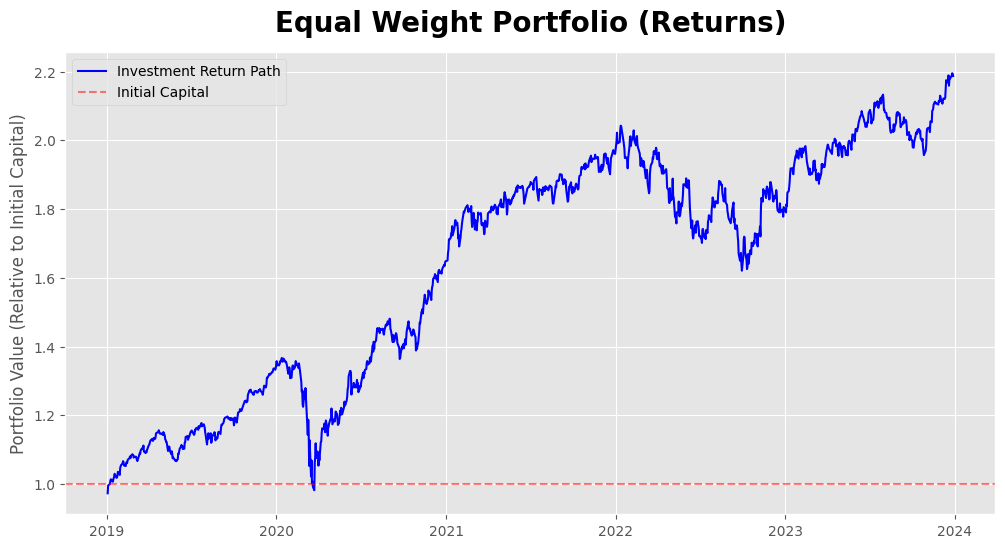

In [104]:
#viz return path (from function)
return_viz = calculate_return_path(equal_weights, data)

return_viz_series = pd.Series(return_viz, index=data.index)
return_viz_series

# viz
plt.figure(figsize=(12, 6))
plt.plot(return_viz_series, label='Investment Return Path', color='blue')
plt.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Initial Capital')
plt.title('Equal Weight Portfolio (Returns)', fontsize=20, pad=15, fontweight='bold')
plt.ylabel('Portfolio Value (Relative to Initial Capital)')
plt.legend()
plt.show()

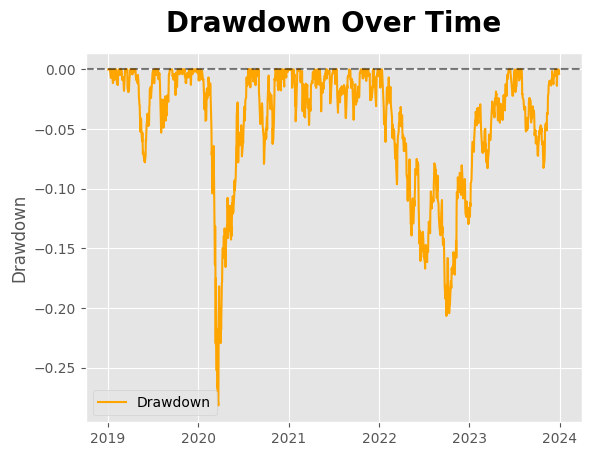

In [105]:
# computing drawdowns
return_viz_series.dropna()
drawdowns = (return_viz_series - return_viz_series.cummax()) / return_viz_series.cummax()
plt.plot(drawdowns, label='Drawdown', color='orange')
plt.axhline(0, color='black', linestyle='--', alpha=0.5)
plt.title('Drawdown Over Time', fontsize=20, pad=15, fontweight='bold')
plt.ylabel('Drawdown')
plt.legend()
plt.show()

In [106]:
max_drawdown = drawdowns.min()
max_drawdown

np.float64(-0.28168839714412847)

In [107]:
#CREATE A PLOTTING FUNCTION!

In [108]:
#plotting function for return path and drawdown
def plot_return_and_drawdown(weights, data):
    return_path = calculate_return_path(weights, data)
    return_viz_series = pd.Series(return_path, index=data.index)
    
    # Plot Return Path
    plt.figure(figsize=(12, 6))
    plt.plot(return_viz_series, label='Investment Return Path', color='blue')
    plt.axhline(y=1, color='red', linestyle='--', alpha=0.5, label='Initial Capital')
    plt.title('Equal Weight Portfolio (Returns)', fontsize=20, pad=15, fontweight='bold')
    plt.ylabel('Portfolio Value (Relative to Initial Capital)')
    plt.legend()
    plt.show()

    print(f'Total Return: {(return_path[-1] - 1):.2%}')
    
    # Compute and Plot Drawdowns
    drawdowns = (return_viz_series - return_viz_series.cummax()) / return_viz_series.cummax()
    plt.figure(figsize=(12, 6))
    plt.plot(drawdowns, label='Drawdown', color='orange')
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.title('Drawdown Over Time', fontsize=20, pad=15, fontweight='bold')
    plt.ylabel('Drawdown')
    plt.legend()
    plt.show()
    
    max_drawdown = drawdowns.min()
    print(f"Maximum Drawdown: {max_drawdown:.2%}")

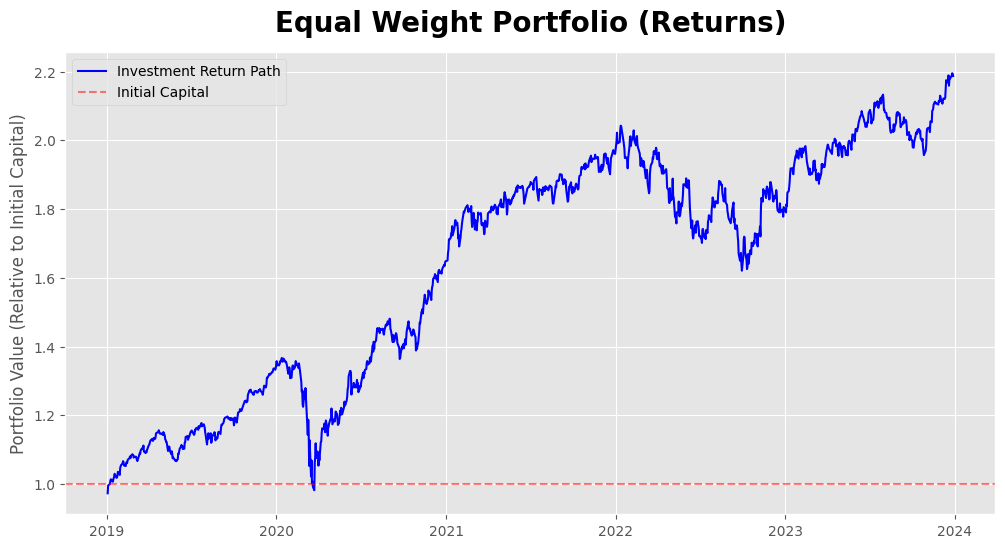

Total Return: 118.74%


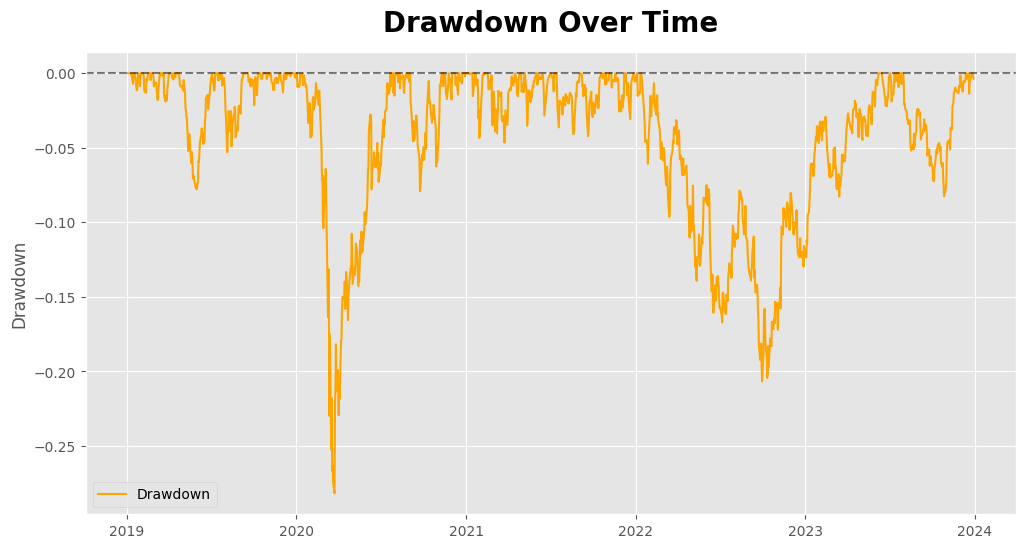

Maximum Drawdown: -28.17%


In [110]:
plot_return_and_drawdown(equal_weights, data)

# Day 3 - MPT Optimization

## 3.1. Inputs I Need

In [111]:
# let's start from scratch to understand this

# inputs: mu, covar matrix

# mu - expected returns based on historical returns for each asset
mu = data.pct_change().mean() * trading_days
mu


Ticker
AAPL    0.378031
BND     0.012835
EEM     0.053375
GLD     0.102324
JPM     0.189012
SPY     0.167224
TSM     0.298916
XOM     0.182362
dtype: float64

In [112]:
# sigma - annual covar matrix - this is used to compute risk
sigma = data.pct_change().cov() * trading_days
sigma.shape

(8, 8)

In [114]:
#functions needed:

#portfolio return (for each asset individually) based on mu (so an estimation, not accounting for compounding and non-additivity in time)
print(calculate_mean_portfolio_returns(equal_weights, data))

#portfolio volatility
print(calculate_volatility(equal_weights, data))

#sharpe ratio
calculate_sharpe_ratio(equal_weights, data)

#negative sharpe ratio
def calculate_negative_sharpe_ratio(weights, data):
    return -(calculate_sharpe_ratio(weights, data))



0.17300983145562476
0.1788075805004846


In [115]:
calculate_negative_sharpe_ratio(equal_weights, data)

np.float64(-0.8405056972980847)

## 3.2. Global Minimum Variance Portfolio (GMVP)

In [119]:
#defining bounds and constraints for scipy
constraints = ({
    'type':'eq',
    'fun':lambda weights: np.sum(weights) - 1
    })

n = len(mu)
bounds = [(0,1)] * n

In [120]:
#define an initial guess for our variable
init_guess = equal_weights

In [ ]:
from scipy.optimize import minimize

In [123]:
minimum_variance_portfolio = minimize(calculate_volatility, init_guess, args=(data,), method='SLSQP', bounds=bounds, constraints=constraints)

In [125]:
minimum_variance_portfolio.x

array([0.        , 0.91912194, 0.        , 0.03212086, 0.0148458 ,
       0.        , 0.        , 0.0339114 ])

In [133]:
#the optimizer is saying that for the minimum global variance we should throw over 90% of the portfolio into bonds.
#what this serves as is a sort of benchmark - it's the leftmost point on the graph, and gives the minimum return we expect.

#let's check what the volatility is:
min_var_port_volatility = calculate_volatility(minimum_variance_portfolio.x, data)

#and what the retuns is (both average and CAGR):
min_var_port_mean_return = calculate_mean_portfolio_returns(minimum_variance_portfolio.x, data)
min_var_port_cagr = calculate_cagr(minimum_variance_portfolio.x, data)

#and the sharpe ratio:
min_var_port_sharpe = calculate_sharpe_ratio(minimum_variance_portfolio.x, data)

print('GMVP Volatility:', min_var_port_volatility)
print('GMVP Mean Returns:', min_var_port_mean_return)
print('GMVP CAGR', min_var_port_cagr)
print('GMVP Sharpe Ratio',min_var_port_sharpe)

GMVP Volatility: 0.0655414263494716
GMVP Mean Returns: 0.024074010933765922
GMVP CAGR 0.022142280385412105
GMVP Sharpe Ratio 0.020642968642003972


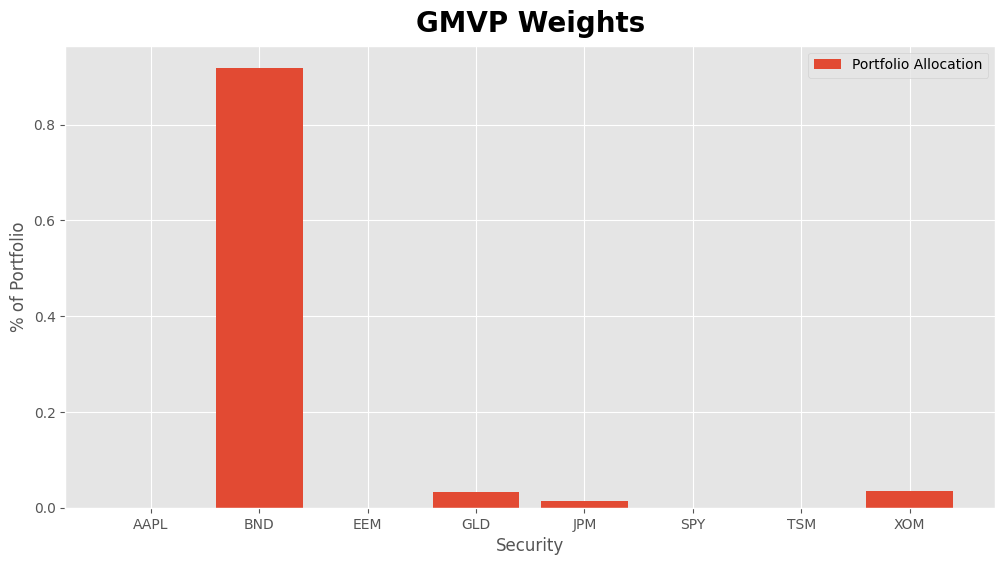

In [148]:
#plotting GMVP
plt.figure(figsize=(12,6))
plt.bar(data.columns, minimum_variance_portfolio.x, label='Portfolio Allocation')
plt.title('GMVP Weights', fontsize=20, pad=10, fontweight='semibold')
plt.xlabel('Security')
plt.ylabel('% of Portfolio')
plt.legend()

## 2.3. Tangency Portfolio (Max Sharpe Ratio)

In [ ]:
#to maximize the sharpe we need to minimize the negative sharpe.

tangency_portfolio = minimize(calculate_negative_sharpe_ratio, init_guess, args=(data), constraints=constraints, bounds=bounds)
tangency_portfolio.x

array([4.49710853e-01, 8.43895479e-17, 0.00000000e+00, 4.39863266e-01,
       0.00000000e+00, 0.00000000e+00, 6.95111134e-02, 4.09147670e-02])

In [150]:
#calculating statistics
#let's check what the volatility is:
tangency_port_volatility = calculate_volatility(tangency_portfolio.x, data)

#and what the retuns is (both average and CAGR):
tangency_port_mean_return = calculate_mean_portfolio_returns(tangency_portfolio.x, data)
tangency_port_cagr = calculate_cagr(tangency_portfolio.x, data)

#and the sharpe ratio:
tangency_port_sharpe = calculate_sharpe_ratio(tangency_portfolio.x, data)

print('Tangency Portfolio Volatility:', tangency_port_volatility)
print('Tangency Portfolio Mean Returns:', tangency_port_mean_return)
print('Tangency Portfolio CAGR:', tangency_port_cagr)
print('Tangency Portfolio Sharpe Ratio:',tangency_port_sharpe)

Tangency Portfolio Volatility: 0.1839040775161806
Tangency Portfolio Mean Returns: 0.24325241218986454
Tangency Portfolio CAGR: 0.2536548476085405
Tangency Portfolio Sharpe Ratio: 1.1991652052716437


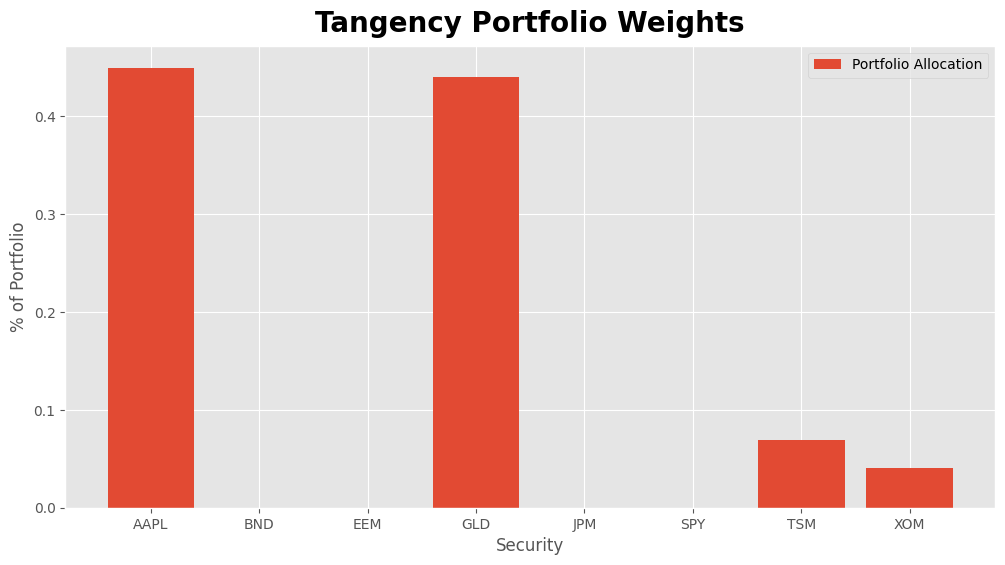

In [151]:
#plotting Tangency Portfolio
plt.figure(figsize=(12,6))
plt.bar(data.columns, tangency_portfolio.x, label='Portfolio Allocation')
plt.title('Tangency Portfolio Weights', fontsize=20, pad=10, fontweight='semibold')
plt.xlabel('Security')
plt.ylabel('% of Portfolio')
plt.legend()

In [ ]:
#maximizing returns for a given level of volatility - run it across a few: vol_targets = np.linspace(0.08, 0.25, 20)


Ticker
AAPL    0.322496
BND     0.067700
EEM     0.225091
GLD     0.149503
JPM     0.318390
SPY     0.210828
TSM     0.355246
XOM     0.342835
dtype: float64

In [ ]:
#plot all portfolio return paths for comparison

## Apple EDA

In [11]:
apple = yf.Ticker('AAPL')

In [17]:
all = apple.history(period='max')
all

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12 00:00:00-05:00,0.098298,0.098725,0.098298,0.098298,469033600,0.0,0.0
1980-12-15 00:00:00-05:00,0.093597,0.093597,0.093169,0.093169,175884800,0.0,0.0
1980-12-16 00:00:00-05:00,0.086758,0.086758,0.086331,0.086331,105728000,0.0,0.0
1980-12-17 00:00:00-05:00,0.088468,0.088895,0.088468,0.088468,86441600,0.0,0.0
1980-12-18 00:00:00-05:00,0.091033,0.091460,0.091033,0.091033,73449600,0.0,0.0
...,...,...,...,...,...,...,...
2026-02-13 00:00:00-05:00,262.010010,262.230011,255.449997,255.779999,56290700,0.0,0.0
2026-02-17 00:00:00-05:00,258.049988,266.290009,255.539993,263.880005,58469100,0.0,0.0
2026-02-18 00:00:00-05:00,263.600006,266.820007,262.450012,264.350006,34203300,0.0,0.0


In [22]:
apple.quarterly_financials

,2025-12-31,2025-09-30,2025-06-30,2025-03-31,2024-12-31
Tax Effect Of Unusual Items,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
Tax Rate For Calcs,1.750000e-01,1.627240e-01,1.640000e-01,1.550000e-01,1.470000e-01
Normalized EBITDA,5.406600e+10,3.555400e+10,3.103200e+10,3.225000e+10,4.591200e+10
Net Income From Continuing Operation Net Minority Interest,4.209700e+10,2.746600e+10,2.343400e+10,2.478000e+10,3.633000e+10
Reconciled Depreciation,3.214000e+09,3.127000e+09,2.830000e+09,2.661000e+09,3.080000e+09
Reconciled Cost Of Revenue,7.452500e+10,5.412500e+10,5.031800e+10,5.049200e+10,6.602500e+10
EBITDA,5.406600e+10,3.555400e+10,3.103200e+10,3.225000e+10,4.591200e+10
EBIT,5.085200e+10,3.242700e+10,2.820200e+10,2.958900e+10,4.283200e+10
Normalized Income,4.209700e+10,2.746600e+10,2.343400e+10,2.478000e+10,3.633000e+10
Net Income From Continuing And Discontinued Operation,4.209700e+10,2.746600e+10,2.343400e+10,2.478000e+10,3.633000e+10


In [23]:
apple.major_holders

Breakdown,Value
insidersPercentHeld,0.01840
institutionsPercentHeld,0.65307
institutionsFloatPercentHeld,0.66531
institutionsCount,7458.00000


In [24]:
apple.institutional_holders

,Date Reported,Holder,pctHeld,Shares,Value,pctChange
0,2025-12-31,Vanguard Group Inc,0.0972,1426283914,380404170515,0.0192
1,2025-12-31,Blackrock Inc.,0.0786,1154665731,307960887248,0.0073
2,2025-12-31,State Street Corporation,0.0411,604056505,161107905286,0.0110
3,2025-12-31,"Geode Capital Management, LLC",0.0244,358032517,95490849549,0.0052
4,2025-12-31,"FMR, LLC",0.0209,307397264,81985921654,0.0137
5,2025-12-31,Morgan Stanley,0.0157,230483035,61472128295,0.0060
6,2025-12-31,"Berkshire Hathaway, Inc",0.0155,227917808,60787956624,-0.0432
7,2025-12-31,JPMORGAN CHASE & CO,0.0154,225419111,60121529168,-0.5237
8,2025-12-31,Price (T.Rowe) Associates Inc,0.0139,203499482,54275345105,-0.0435
9,2025-12-31,NORGES BANK,0.0131,192255086,51276352344,0.0129


In [30]:
apple.recommendations_summary

,period,strongBuy,buy,hold,sell,strongSell
0,0m,5,24,16,1,1
1,-1m,6,23,15,1,2
2,-2m,5,24,15,1,3
3,-3m,5,24,15,1,3


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>], dtype=object)

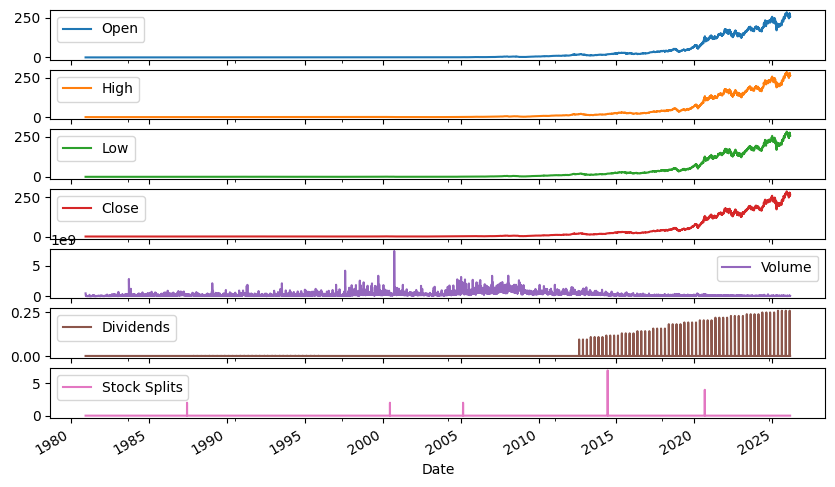

In [34]:
all.plot(figsize=(10,6), subplots=True)